In [13]:
import numpy as np
import sys,math
sys.path.append('../../../programs/extractdropletdata/')
import millidrop_dataclass as mdc
import os,glob
#import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
dropfiles = glob.glob('droplets/*.csv')
templatefile = 'template.csv'

# fluo_1_mean: PVD
# fluo_2_mean: mCherry
# fluo_3_mean: GFP
# fluo_4_mean: YFP

kwargs = {'infiles':dropfiles,'templatefile':templatefile,'datacolumns':['time','fluo_2_mean','fluo_1_mean']}

data = mdc.DropletData(**kwargs)


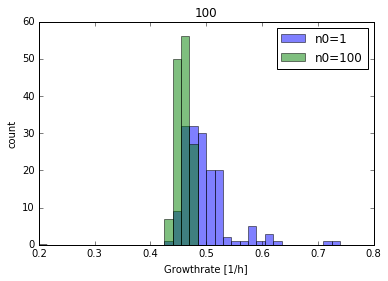

In [59]:
number_points = 4

for label,trajectories in data:
    if label == '1' or label == '100': #label.upper() != 'SEPARATOR':
        plt.title(label)
        gr = list()
        y = list()
        for t in trajectories:
            t[:,0] /= 3.6e3
            grt = np.array([(number_points * np.sum(t[i:i+number_points,0] * np.log(t[i:i+number_points,1])) - np.sum(t[i:i+number_points,0])*np.sum(np.log(t[i:i+number_points,1]))) / \
                            (number_points * np.sum(t[i:i+number_points,0] * t[i:i+number_points,0])         - np.sum(t[i:i+number_points,0])*np.sum(t[i:i+number_points,0])) for i in range(len(t[:,0]-number_points))])
            
            
            gr.append(np.max(grt))
            y.append(np.max(t[:,1]))
            
        plt.hist(gr,range=(0.2,.8),bins=40,alpha=.5)
        plt.xlabel('Growthrate [1/h]')
        plt.ylabel('count')
        plt.legend(['n0=1','n0=100'])
plt.show()
    

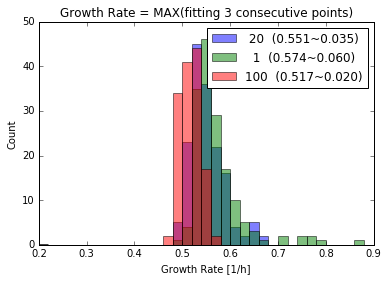

In [76]:
number_points = 3
lgnd = list()
plt.title('Growth Rate = MAX(fitting 3 consecutive points)')
for label,trajectories in data:
    if label == '1' or label == '100' or label == '20': #label.upper() != 'SEPARATOR':
        gr = list()
        y = list()
        for t in trajectories:
            t[:,0] /= 3.6e3
            grt = np.array([(number_points * np.sum(t[i:i+number_points,0] * np.log(t[i:i+number_points,1])) - np.sum(t[i:i+number_points,0])*np.sum(np.log(t[i:i+number_points,1]))) / \
                            (number_points * np.sum(t[i:i+number_points,0] * t[i:i+number_points,0])         - np.sum(t[i:i+number_points,0])*np.sum(t[i:i+number_points,0])) for i in range(len(t[:,0]-number_points))])
            
            
            gr.append(np.max(grt))
            y.append(np.max(t[:,1]))
            
        plt.hist(gr,range=(0.2,.9),bins=35,alpha=.5)
        plt.xlabel('Growth Rate [1/h]')
        plt.ylabel('Count')
        lgnd.append('{:3d}  ({:.3f}~{:.3f})'.format(int(label),np.mean(gr),np.std(gr)))
plt.legend(lgnd)
plt.show()
    